Le preprocessing est le fait de trier, réorganiser ou modifier les valeurs d'un dataset afin que le model puisse mieux fonctionner.

### Ajourd'hui, on se concentre sur le preprocessing

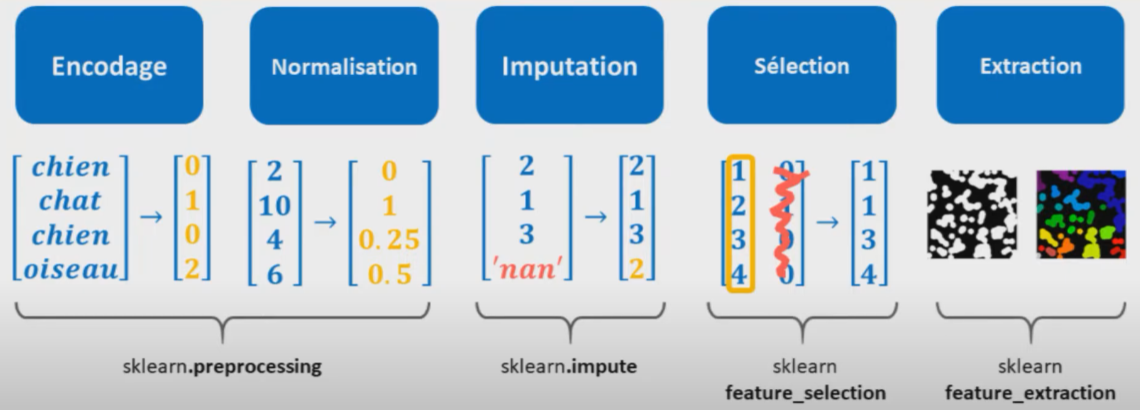

In [52]:
# Importation des bibliothèques principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des fonctions de manipulation des données
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, Binarizer, KBinsDiscretizer
from sklearn.pipeline import make_pipeline

# Importation des métriques
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, median_absolute_error


[image.png](attachment:image.png)
[image-2.png](attachment:image-2.png)

fit_transform()
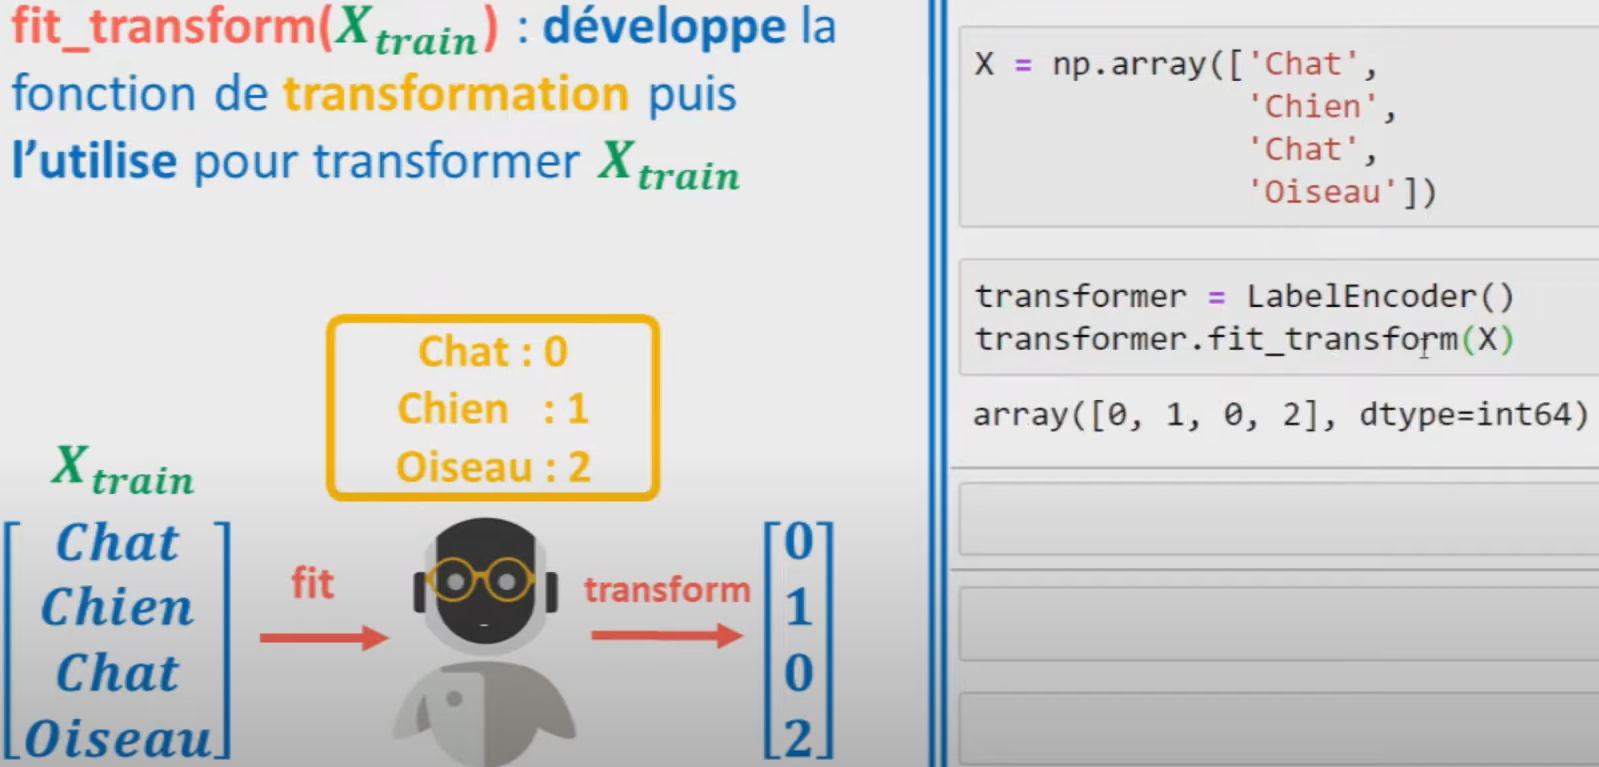
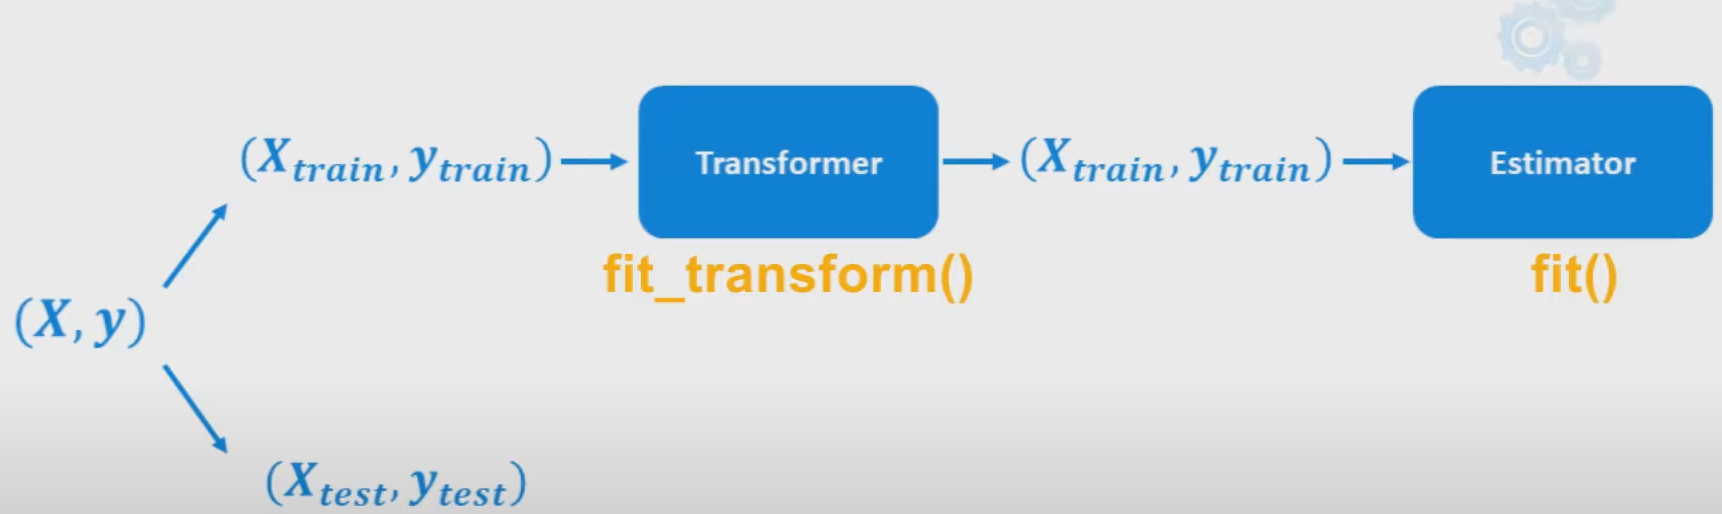
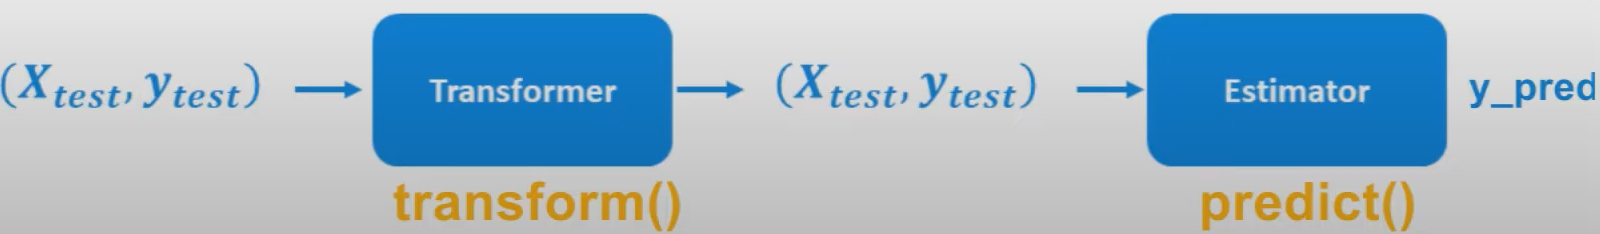
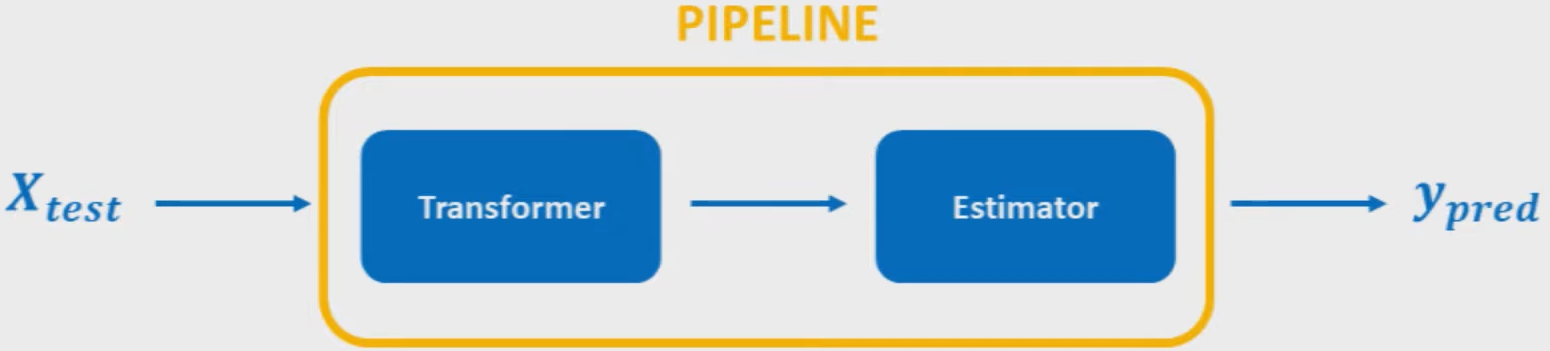

## Encodage

1) Encodage ordinal (LabelEncoder(), OrdinalEncoder()): associe chaque catégorie ou valeur(chat, chien, chien, chat) à une valeur décimale(0, 1, 1, 0)

In [2]:
#LabelEncoder ne permet de traiter QUE la variable y, donc une seule colonne
y = np.array(["chat", "chien", "chat", "oiseau"])

encoder = LabelEncoder()
encoder.fit(y)
print("Voici toutes les catégorie:", encoder.classes_)
encoder.transform(y)
#Plus rapidement:
encoder.fit_transform(y)

#Pour faire l'inverse(un décodeur):
encoder.inverse_transform([0, 1, 2, 0])


Voici toutes les catégorie: ['chat' 'chien' 'oiseau']


array(['chat', 'chien', 'oiseau', 'chat'], dtype='<U6')

In [3]:
#Ordinal encoder permet de traiter plusieurs colonnes
X = np.array([
    ['Chat', 'Poils'],
    ['Chien', 'Poils'],
    ['Chat', 'Poils'],
    ['Oiseau', 'Plumes']
])
encoder = OrdinalEncoder()
encoder.fit(X)
encoder.transform(X)
#PLus rapidement:
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

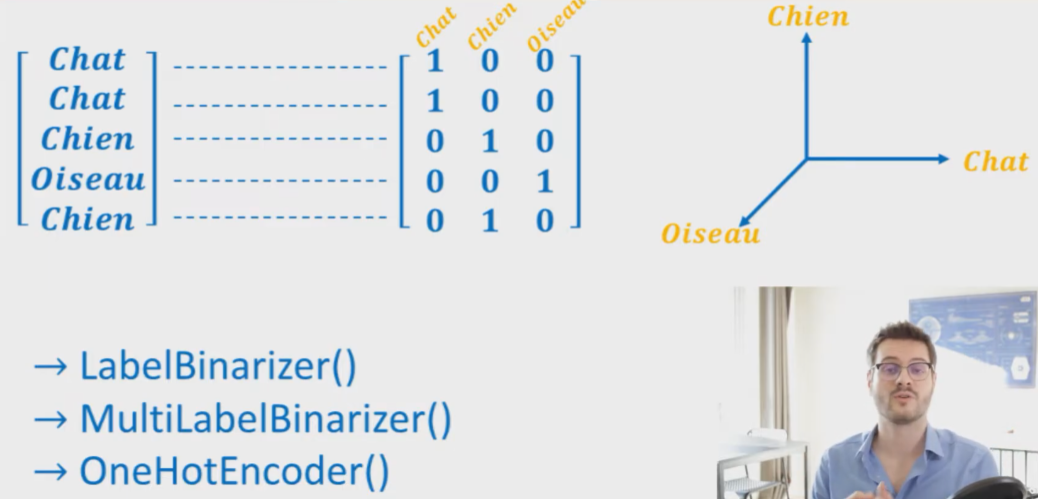

In [4]:
#Encodage one-hot
encoder = OneHotEncoder()
encoder.fit_transform(X)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (4, 5)>

## La normalisation:

Mettre toutes les données sur une même échelle. ATTENTION: NE PAS UTILISER EN PRESENCE D'OUTLIERS(VALEURS ABERANTES)

#### Normalisation min-max

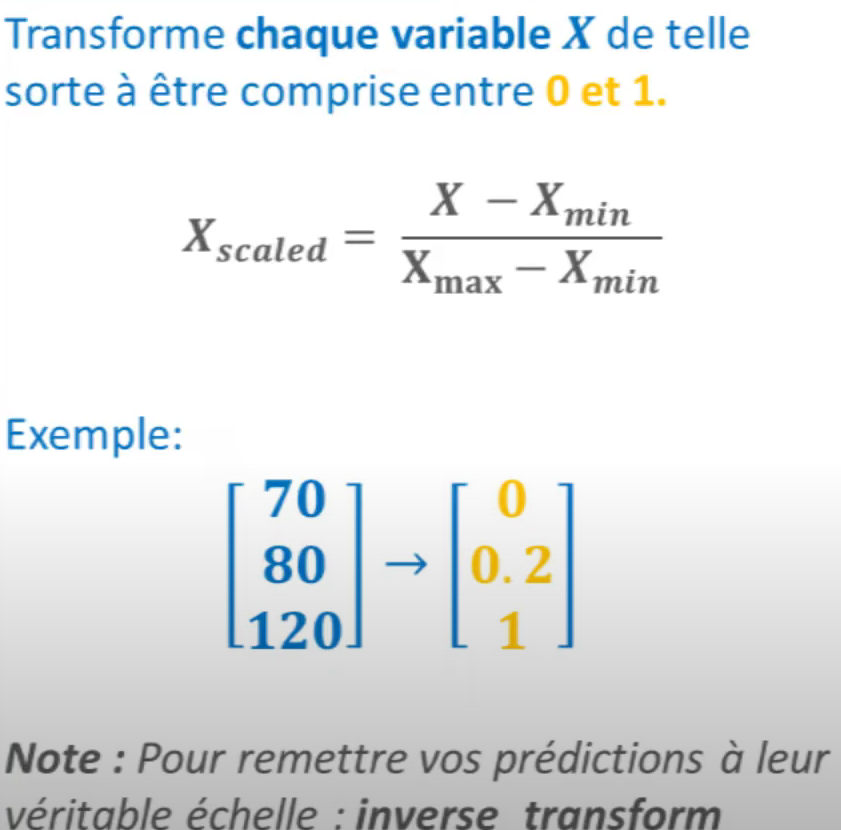

Si l'on utilise pas le min max du test set c'est pour éviter le data leakage (afin de mieux comprendre: https://g.co/gemini/share/357205aca960)
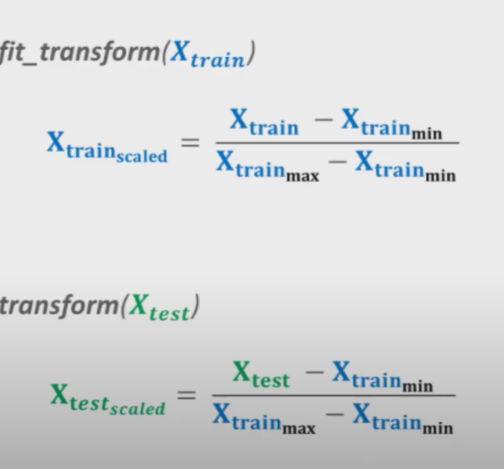

In [5]:
X = np.array([[70], [80], [120]])

scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

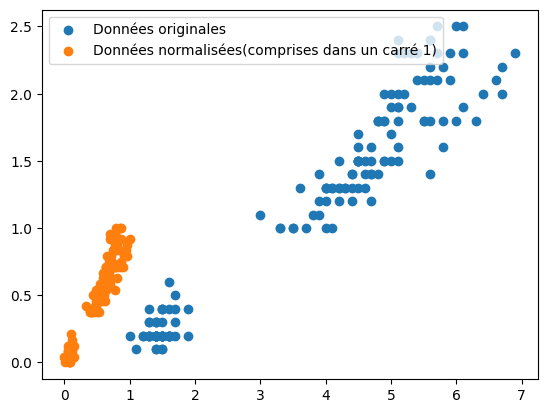

In [24]:
#Importe le dataset iris
iris = load_iris()
X = iris.data
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

#Dans le dataset Iris, les colonnes correspondent à : 
#1. Longueur des sépales (cm)
#2. Largeur des sépales (cm)
#3. Longueur des pétales (cm) ← X[:, 2]
#4. Largeur des pétales (cm) ← X[:, 3]
plt.scatter(X[:, 2], X[:, 3], label="Données originales")
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label="Données normalisées(comprises dans un carré 1)")
plt.legend()

## Standardisation

Objectif ? Obtenir une moyenne nulle et un écart type de 1; ATTENTION: NE PAS UTILISER EN PRESENCE D'OUTLIERS(VALEURS ABERANTES)

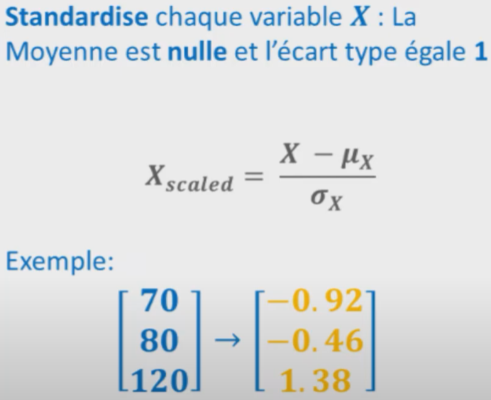

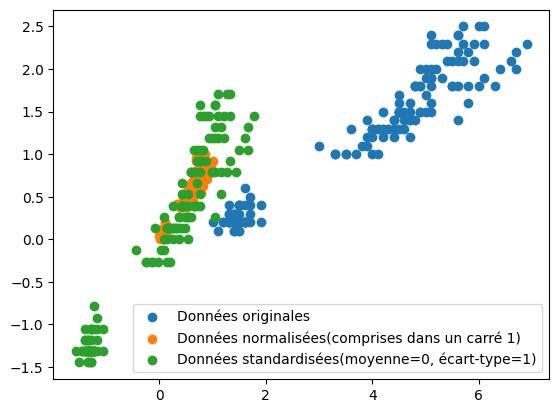

In [26]:
iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_stds = scaler.fit_transform(X)

#Affiche les 3 types de dopnnées
plt.scatter(X[:, 2], X[:, 3], label="Données originales")
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label="Données normalisées(comprises dans un carré 1)")
plt.scatter(X_stds[:, 2], X_stds[:, 3], label="Données standardisées(moyenne=0, écart-type=1)")
plt.legend()


## RobustScaler
Très peu sensible aux outliers

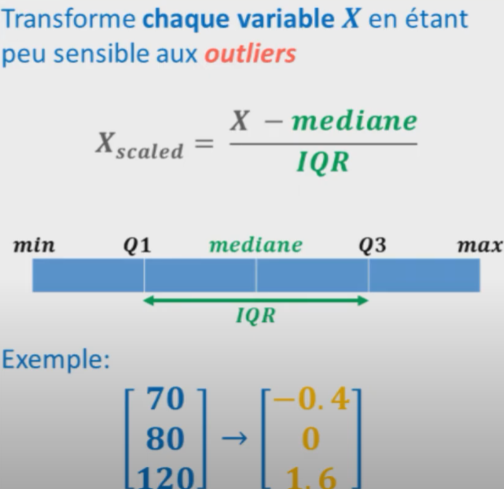

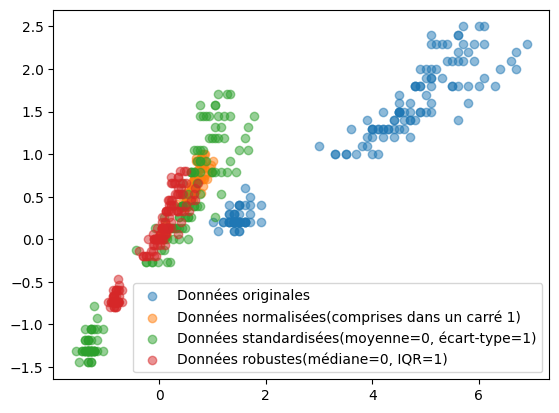

In [34]:
scaler = RobustScaler()
X_robust = scaler.fit_transform(X)
# Affiche les 4 types de données
plt.scatter(X[:, 2], X[:, 3], label="Données originales", alpha=0.5)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label="Données normalisées(comprises dans un carré 1)", alpha=0.5)
plt.scatter(X_stds[:, 2], X_stds[:, 3], label="Données standardisées(moyenne=0, écart-type=1)", alpha=0.5)
plt.scatter(X_robust[:, 2], X_robust[:, 3], label="Données robustes(médiane=0, IQR=1)", alpha=0.5)
plt.legend()

## PolynomialFeatures
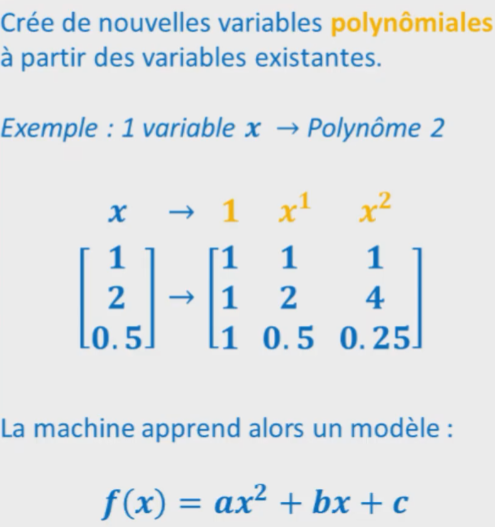 

NE PAS OUBLIER DE NORMALISER ENSUITE LES DONEES

In [39]:
X = np.array([[1], [2], [0.5]])

poly = PolynomialFeatures(3).fit_transform(X)
poly

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

Modèle avec données originales

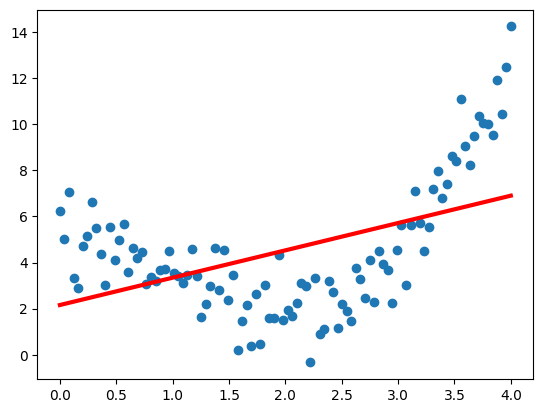

In [40]:
# Génération des données
X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5 * np.cos(X) + np.random.randn(100, 1)

# Affichage des points
plt.scatter(X, y)

# Régression linéaire
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Affichage de la droite de régression
plt.plot(X, y_pred, c='r', lw=3)
plt.show()

Modèle avec données polynomiales

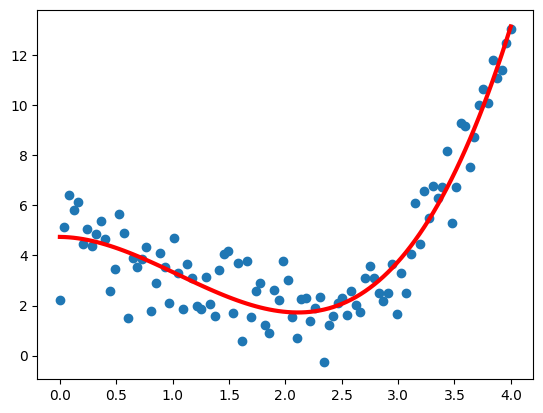

In [41]:
# Génération des données
X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5 * np.cos(X) + np.random.randn(100, 1)

# Affichage des points
plt.scatter(X, y)

# Transformation polynomiale des features (degré 3)
X_poly = PolynomialFeatures(3).fit_transform(X)

# Régression linéaire sur les données polynomiales
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

# Affichage de la courbe de régression polynomiale
plt.plot(X, y_pred, c='r', lw=3)
plt.show()

### Discrétisation

In [45]:
X = np.linspace(0, 5, 10).reshape((10, 1))
print(X)
#Permet de binariser les données, c'est-à-dire de les transformer en 0 ou 1 selon un seuil
print(np.hstack((X, Binarizer(threshold=3).fit_transform(X))))

[[0.        ]
 [0.55555556]
 [1.11111111]
 [1.66666667]
 [2.22222222]
 [2.77777778]
 [3.33333333]
 [3.88888889]
 [4.44444444]
 [5.        ]]
[[0.         0.        ]
 [0.55555556 0.        ]
 [1.11111111 0.        ]
 [1.66666667 0.        ]
 [2.22222222 0.        ]
 [2.77777778 0.        ]
 [3.33333333 1.        ]
 [3.88888889 1.        ]
 [4.44444444 1.        ]
 [5.         1.        ]]


In [49]:
#Permet de discrétiser les données de la même façon que la binarisation, mais en les transformant en plusieurs catégories
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

## SKlearn PIPELINE

Permet de créer une pipeline en une seule ligne de code (assembler la normalisation et l'estimator)
=> plusieurs avantages: 
* \+ simple d'utilisation
* Evite un data leakage
* Permet le cross validation (et donc GridSearchCV)

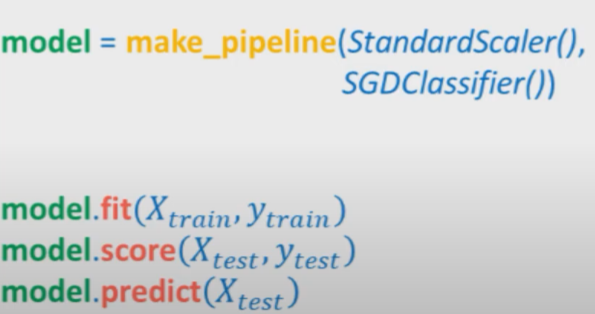
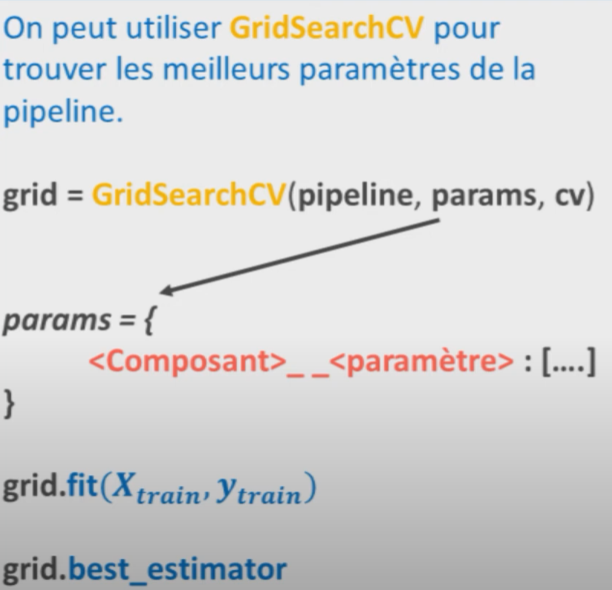

In [54]:
X = iris.data
y = iris.target
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#On crée un pipeline qui standardise les données puis applique un classificateur SGD
model = make_pipeline(StandardScaler(), SGDClassifier())
# Entraînement du modèle
model.fit(X_train, y_train)
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

In [79]:
X = iris.data
y = iris.target
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Utilisation avec GridSearchCV pour optimiser les hyperparamètres
# Ne pas oublier qu'après avoir effectué un changement de données en polynomiales, il faut normaliser les données
model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0))
#Permet de visualiser les hyperparamètres à faire modifier dans le GridSearchCV
print(model.get_params())
# Définition de la grille de paramètres à tester
param_grid = {
    "polynomialfeatures__degree": [1, 2, 3, 4],
    "sgdclassifier__penalty": ["l1", "l2"]
}
# Création de l'objet GridSearchCV function(pipeline, paramètres à faire varier, nombre de folds pour la validation croisée)
grid = GridSearchCV(model, param_grid, cv=5)

# Entraînement du modèle avec la grille de paramètres
grid.fit(X_train, y_train)
# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid.best_params_)
# Test du modèle sur l'ensemble de test
score = grid.score(X_test, y_test)
print("Score du modèle sur l'ensemble de test:", score)
#Score de 97%

#Essai sans le preprocessing pour profiter la différence
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)
#Score de 73%

{'memory': None, 'steps': [('polynomialfeatures', PolynomialFeatures()), ('standardscaler', StandardScaler()), ('sgdclassifier', SGDClassifier(random_state=0))], 'transform_input': None, 'verbose': False, 'polynomialfeatures': PolynomialFeatures(), 'standardscaler': StandardScaler(), 'sgdclassifier': SGDClassifier(random_state=0), 'polynomialfeatures__degree': 2, 'polynomialfeatures__include_bias': True, 'polynomialfeatures__interaction_only': False, 'polynomialfeatures__order': 'C', 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'sgdclassifier__alpha': 0.0001, 'sgdclassifier__average': False, 'sgdclassifier__class_weight': None, 'sgdclassifier__early_stopping': False, 'sgdclassifier__epsilon': 0.1, 'sgdclassifier__eta0': 0.0, 'sgdclassifier__fit_intercept': True, 'sgdclassifier__l1_ratio': 0.15, 'sgdclassifier__learning_rate': 'optimal', 'sgdclassifier__loss': 'hinge', 'sgdclassifier__max_iter': 1000, 'sgdclassifier__n_iter_no_change

0.7333333333333333